In [1]:
#Importing libraries

import pandas as pd
from pandas import datetime
import numpy as np

from nsepy import get_history
from datetime import date

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

from bokeh.plotting import figure, output_file, show
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn import preprocessing
from sklearn import linear_model 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoLars

In [2]:
infy =  get_history(symbol="INFY",start=date(2015,1,1),end=date(2016,12,30))
infy.head(3)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.4,1971.34,500691,9.870306e+13,14908,258080,0.5154
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.2,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.9,2004.59,2484256,4.979911e+14,82694,1830962,0.7370


In [3]:
tcs = get_history(symbol="TCS",start=date(2015,1,1),end=date(2016,12,30))
tcs.head(3)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.0,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883
2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.4,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683
2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.1,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207


In [4]:
nifty_it = get_history(symbol="NIFTYIT",start=date(2015,1,1),end=date(2016,12,30),index=True)
nifty_it.head(3)

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09
2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09
2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10


In [5]:
def set_index(stock):
    stock.insert(0, 'Date',  pd.to_datetime(stock.index,format='%Y-%m-%d') )
    stock.index=stock['Date']
    return stock

In [6]:
set_index(infy)
set_index(tcs)
set_index(nifty_it)

,Date,Open,High,Low,Close,Volume,Turnover
Date,,,,,,,
2015-01-01,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09
2015-01-02,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09
2015-01-05,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10
2015-01-06,2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10
2015-01-07,2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10
2015-01-08,2015-01-08,11031.15,11058.15,10915.05,11018.15,12975117,1.485630e+10
2015-01-09,2015-01-09,11058.05,11484.90,10932.20,11399.65,24812224,3.536420e+10
2015-01-12,2015-01-12,11456.00,11565.85,11378.80,11543.65,16505074,1.712310e+10
2015-01-13,2015-01-13,11545.25,11546.60,11437.95,11502.80,12511358,1.417510e+10


In [7]:
infy.name = "INFY"
tcs.name = "TCS"
nifty_it.name = "NIFTY_IT"

In [8]:
#function to calculate Moving averages

def moving_average(stock,weeks=[4,16,28,40,52]):
    
    #resampling data on weekly basis
    weekly_data = pd.DataFrame()
    weekly_data['Close']=stock['Close'].resample('W').mean()
    
    for i in range(len(weeks)):
        ma = weekly_data['Close'].rolling(weeks[i]).mean()
        weekly_data[" Mov.AVG for " + str(weeks[i])+ " Weeks"] = ma
        print('Calculated Moving Averages: for {0} weeks: \n\n {1}' .format(weeks[i], ma))
        
    weekly_data.plot(title="Moving Averages for {} \n\n" .format(stock.name))
     
 

Calculated Moving Averages: for 4 weeks: 

 Date
2015-01-04            NaN
2015-01-11            NaN
2015-01-18            NaN
2015-01-25    2066.235000
2015-02-01    2103.313125
2015-02-08    2146.480625
2015-02-15    2188.145625
2015-02-22    2221.681250
2015-03-01    2255.998958
2015-03-08    2284.241458
2015-03-15    2263.721458
2015-03-22    2251.008333
2015-03-29    2231.787500
2015-04-05    2213.991667
2015-04-12    2212.904167
2015-04-19    2203.326667
2015-04-26    2179.184167
2015-05-03    2118.051875
2015-05-10    2057.684375
2015-05-17    1995.734375
2015-05-24    1977.131875
2015-05-31    1988.190000
2015-06-07    2005.050000
2015-06-14    2014.917500
2015-06-21    1756.177500
2015-06-28    1505.312500
2015-07-05    1246.970000
2015-07-12     987.242500
2015-07-19     982.917500
2015-07-26    1002.297500
                 ...     
2016-06-12    1227.187500
2016-06-19    1220.432500
2016-06-26    1218.155000
2016-07-03    1195.280000
2016-07-10    1181.040625
2016-07-17    1

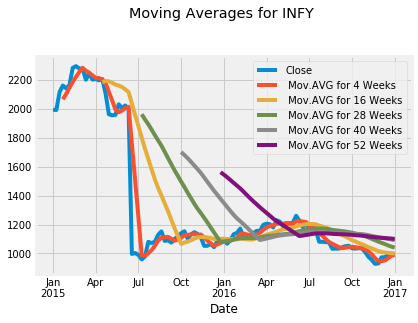

In [9]:
infy_ma = moving_average(infy)

Calculated Moving Averages: for 4 weeks: 

 Date
2015-01-04            NaN
2015-01-11            NaN
2015-01-18            NaN
2015-01-25    2515.817500
2015-02-01    2504.464375
2015-02-08    2522.176875
2015-02-15    2512.879375
2015-02-22    2546.825000
2015-03-01    2587.038542
2015-03-08    2631.784167
2015-03-15    2665.914167
2015-03-22    2650.476042
2015-03-29    2621.495625
2015-04-05    2579.400833
2015-04-12    2579.128333
2015-04-19    2579.807083
2015-04-26    2551.864583
2015-05-03    2535.106250
2015-05-10    2507.253750
2015-05-17    2491.182500
2015-05-24    2516.797500
2015-05-31    2547.405000
2015-06-07    2571.160000
2015-06-14    2581.772500
2015-06-21    2574.105000
2015-06-28    2565.820000
2015-07-05    2561.247500
2015-07-12    2562.475000
2015-07-19    2564.935000
2015-07-26    2554.092500
                 ...     
2016-06-12    2573.722500
2016-06-19    2575.767500
2016-06-26    2605.292500
2016-07-03    2575.172500
2016-07-10    2540.428750
2016-07-17    2

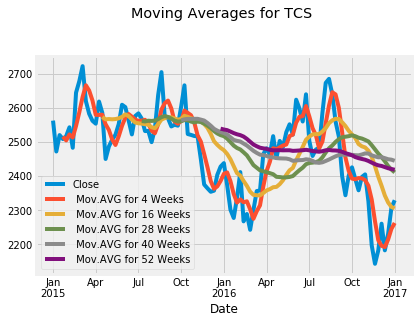

In [10]:
tcs_ma = moving_average(tcs)

Calculated Moving Averages: for 4 weeks: 

 Date
2015-01-04             NaN
2015-01-11             NaN
2015-01-18             NaN
2015-01-25    11444.470000
2015-02-01    11567.988750
2015-02-08    11804.868750
2015-02-15    11979.983750
2015-02-22    12186.592500
2015-03-01    12381.436250
2015-03-08    12549.675000
2015-03-15    12570.822500
2015-03-22    12505.691250
2015-03-29    12389.886250
2015-04-05    12218.992500
2015-04-12    12160.572500
2015-04-19    12096.622500
2015-04-26    11930.410000
2015-05-03    11684.466250
2015-05-10    11427.131250
2015-05-17    11199.181250
2015-05-24    11217.878750
2015-05-31    11332.417500
2015-06-07    11397.670000
2015-06-14    11406.707500
2015-06-21    11318.967500
2015-06-28    11273.917500
2015-07-05    11217.175000
2015-07-12    11164.297500
2015-07-19    11156.207500
2015-07-26    11200.775000
                  ...     
2016-06-12    11268.392500
2016-06-19    11304.115000
2016-06-26    11371.007500
2016-07-03    11261.517500
2016-0

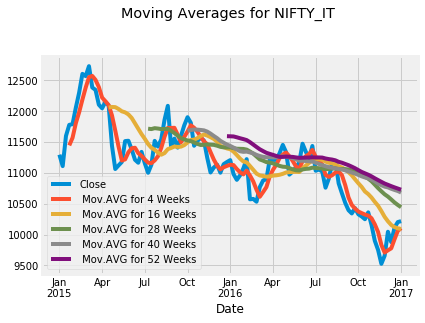

In [11]:
nifty_it_ma = moving_average(nifty_it)

In [12]:
#resampling data on daily basis
#Assuming only vacations on Saturday and Sunday
#generating data for Saturdays and Sundays

infy = infy.asfreq("D",method="ffill")
tcs = tcs.asfreq("D",method="ffill")
nifty_it = nifty_it.asfreq("D",method="ffill")

In [13]:
def Rolling_window(stock,window = [10,75]):
    no_vacation_data = pd.DataFrame()
    no_vacation_data["Close"] = stock["Close"]
    
    for i in range(len(window)):
        ma = no_vacation_data["Close"].rolling(window[i]).mean()
        no_vacation_data["Moving avg for"+ str(window[i])+"window"] = ma
        print("Moving average: for {0} rolling window: \n\n{1}".format(window[i],ma))
        
    no_vacation_data.plot(title="Moving Averages for {} \n\n" .format(stock.name))

In [14]:
Rolling_window(infy)

Moving average: for 10 rolling window: 

Date
2015-01-01         NaN
2015-01-02         NaN
2015-01-03         NaN
2015-01-04         NaN
2015-01-05         NaN
2015-01-06         NaN
2015-01-07         NaN
2015-01-08         NaN
2015-01-09         NaN
2015-01-10    2005.000
2015-01-11    2015.005
2015-01-12    2025.280
2015-01-13    2032.850
2015-01-14    2044.395
2015-01-15    2058.230
2015-01-16    2074.640
2015-01-17    2090.115
2015-01-18    2104.600
2015-01-19    2107.405
2015-01-20    2112.380
2015-01-21    2121.925
2015-01-22    2129.975
2015-01-23    2142.590
2015-01-24    2151.230
2015-01-25    2159.310
2015-01-26    2168.985
2015-01-27    2170.805
2015-01-28    2173.430
2015-01-29    2177.730
2015-01-30    2179.500
                ...   
2016-12-01     960.075
2016-12-02     965.105
2016-12-03     969.530
2016-12-04     972.950
2016-12-05     971.365
2016-12-06     970.265
2016-12-07     969.155
2016-12-08     969.645
2016-12-09     971.320
2016-12-10     972.700
2016-12-11 

AttributeError: 'DataFrame' object has no attribute 'name'

In [15]:
def Volume_shock(stock):
    stock["Volume_next"] = stock["Volume"].shift(1)
    stock["%increment"] = (stock["Volume_next"]-stock["Volume"])/stock["Volume"]*100
    
    stock["Volume_shock_exists"] = ((abs(stock["%increment"]))>10).astype(int)
    stock["Volume_shock_direction"] = ((stock["%increment"])>=0).astype(int)
    
    drop_column_list = ["%increment","Volume_next"]
    stock = stock.drop(drop_column_list,axis=1)
    
    return stock

In [16]:
Volume_shock(infy)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Volume_shock_exists,Volume_shock_direction
Date,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.90,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154,0,0
2015-01-02,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.00,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,1,0
2015-01-03,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.00,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,0,1
2015-01-04,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.00,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,0,1
2015-01-05,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.50,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370,1,0
2015-01-06,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.10,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332,0,1
2015-01-07,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.00,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270,1,1
2015-01-08,2015-01-08,INFY,EQ,1963.55,1985.60,1997.00,1950.00,1979.25,1973.45,1972.78,3391230,6.690160e+14,92752,2686012,0.7920,1,0
2015-01-09,2015-01-09,INFY,EQ,1973.45,1980.10,2109.00,1913.05,2075.30,2074.45,2037.69,11215832,2.285439e+15,359214,3369489,0.3004,1,0


In [17]:
Volume_shock(tcs)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Volume_shock_exists,Volume_shock_direction
Date,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,TCS,EQ,2558.25,2567.00,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883,0,0
2015-01-02,2015-01-02,TCS,EQ,2545.55,2551.00,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683,1,0
2015-01-03,2015-01-02,TCS,EQ,2545.55,2551.00,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683,0,1
2015-01-04,2015-01-02,TCS,EQ,2545.55,2551.00,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683,0,1
2015-01-05,2015-01-05,TCS,EQ,2579.45,2581.00,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207,1,0
2015-01-06,2015-01-06,TCS,EQ,2540.25,2529.10,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894,1,0
2015-01-07,2015-01-07,TCS,EQ,2446.60,2470.00,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724,0,0
2015-01-08,2015-01-08,TCS,EQ,2417.70,2442.40,2449.00,2420.55,2446.00,2443.80,2434.81,782704,1.905739e+14,47699,450768,0.5759,1,1
2015-01-09,2015-01-09,TCS,EQ,2443.80,2455.00,2519.90,2450.00,2510.00,2512.30,2490.01,1598821,3.981082e+14,81743,865777,0.5415,1,0


In [18]:
Volume_shock(nifty_it)

,Date,Open,High,Low,Close,Volume,Turnover,Volume_shock_exists,Volume_shock_direction
Date,,,,,,,,,
2015-01-01,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,0,0
2015-01-02,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,1,0
2015-01-03,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,0,1
2015-01-04,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,0,1
2015-01-05,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,1,1
2015-01-06,2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10,1,0
2015-01-07,2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10,1,1
2015-01-08,2015-01-08,11031.15,11058.15,10915.05,11018.15,12975117,1.485630e+10,1,0
2015-01-09,2015-01-09,11058.05,11484.90,10932.20,11399.65,24812224,3.536420e+10,1,0


In [19]:
#deleting unnecessary columns

del_col_list=["Volume_next", "%increment"]
infy=infy.drop(del_col_list,axis=1)
tcs=tcs.drop(del_col_list,axis=1)
nifty_it=nifty_it.drop(del_col_list,axis=1)

In [20]:
def Price_shock(stock):
    stock["Close_next"]=stock["Close"].shift(1)
    stock["%increment"]=(stock["Close_next"]-stock["Close"])/stock["Close"]*100
    
    stock["Price_shock_exists"]=((abs(stock["%increment"]))>2).astype(int)
    stock["Price_shock_direction"]=((stock["%increment"])>=0).astype(int)
    
    drop_column_list=["%increment","Close_next"]
    stock=stock.drop(drop_column_list,axis=1)
    
    return stock

In [21]:
Price_shock(infy)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Volume_shock_exists,Volume_shock_direction,Price_shock_exists,Price_shock_direction
Date,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.90,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154,0,0,0,0
2015-01-02,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.00,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,1,0,0,0
2015-01-03,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.00,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,0,1,0,1
2015-01-04,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.00,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,0,1,0,1
2015-01-05,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.50,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370,1,0,0,1
2015-01-06,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.10,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332,0,1,1,1
2015-01-07,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.00,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270,1,1,0,0
2015-01-08,2015-01-08,INFY,EQ,1963.55,1985.60,1997.00,1950.00,1979.25,1973.45,1972.78,3391230,6.690160e+14,92752,2686012,0.7920,1,0,0,0
2015-01-09,2015-01-09,INFY,EQ,1973.45,1980.10,2109.00,1913.05,2075.30,2074.45,2037.69,11215832,2.285439e+15,359214,3369489,0.3004,1,0,1,0


In [22]:
Price_shock(tcs)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Volume_shock_exists,Volume_shock_direction,Price_shock_exists,Price_shock_direction
Date,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,TCS,EQ,2558.25,2567.00,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883,0,0,0,0
2015-01-02,2015-01-02,TCS,EQ,2545.55,2551.00,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683,1,0,0,0
2015-01-03,2015-01-02,TCS,EQ,2545.55,2551.00,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683,0,1,0,1
2015-01-04,2015-01-02,TCS,EQ,2545.55,2551.00,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683,0,1,0,1
2015-01-05,2015-01-05,TCS,EQ,2579.45,2581.00,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207,1,0,0,1
2015-01-06,2015-01-06,TCS,EQ,2540.25,2529.10,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894,1,0,1,1
2015-01-07,2015-01-07,TCS,EQ,2446.60,2470.00,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724,0,0,0,1
2015-01-08,2015-01-08,TCS,EQ,2417.70,2442.40,2449.00,2420.55,2446.00,2443.80,2434.81,782704,1.905739e+14,47699,450768,0.5759,1,1,0,0
2015-01-09,2015-01-09,TCS,EQ,2443.80,2455.00,2519.90,2450.00,2510.00,2512.30,2490.01,1598821,3.981082e+14,81743,865777,0.5415,1,0,1,0


In [23]:
Price_shock(nifty_it)

,Date,Open,High,Low,Close,Volume,Turnover,Volume_shock_exists,Volume_shock_direction,Price_shock_exists,Price_shock_direction
Date,,,,,,,,,,,
2015-01-01,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,0,0,0,0
2015-01-02,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,1,0,0,0
2015-01-03,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,0,1,0,1
2015-01-04,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,0,1,0,1
2015-01-05,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,1,1,0,1
2015-01-06,2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10,1,0,1,1
2015-01-07,2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10,1,1,0,1
2015-01-08,2015-01-08,11031.15,11058.15,10915.05,11018.15,12975117,1.485630e+10,1,0,0,0
2015-01-09,2015-01-09,11058.05,11484.90,10932.20,11399.65,24812224,3.536420e+10,1,0,1,0


In [24]:
del_col_list=["Close_next", "%increment"]
infy=infy.drop(del_col_list,axis=1)
tcs=tcs.drop(del_col_list,axis=1)
nifty_it=nifty_it.drop(del_col_list,axis=1)

In [25]:
def Price_shock_wo_volume_shock(stock):
    
    stock["P_shock_wo_v_shock"]=(~stock["Volume_shock_exists"]) & stock["Price_shock_exists"]
    
    return stock
        

In [26]:
Price_shock_wo_volume_shock(infy)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Volume_shock_exists,Volume_shock_direction,Price_shock_exists,Price_shock_direction,P_shock_wo_v_shock
Date,,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.90,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154,0,0,0,0,0
2015-01-02,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.00,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,1,0,0,0,0
2015-01-03,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.00,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,0,1,0,1,0
2015-01-04,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.00,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,0,1,0,1,0
2015-01-05,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.50,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370,1,0,0,1,0
2015-01-06,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.10,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332,0,1,1,1,1
2015-01-07,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.00,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270,1,1,0,0,0
2015-01-08,2015-01-08,INFY,EQ,1963.55,1985.60,1997.00,1950.00,1979.25,1973.45,1972.78,3391230,6.690160e+14,92752,2686012,0.7920,1,0,0,0,0
2015-01-09,2015-01-09,INFY,EQ,1973.45,1980.10,2109.00,1913.05,2075.30,2074.45,2037.69,11215832,2.285439e+15,359214,3369489,0.3004,1,0,1,0,0


In [27]:
Price_shock_wo_volume_shock(tcs)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Volume_shock_exists,Volume_shock_direction,Price_shock_exists,Price_shock_direction,P_shock_wo_v_shock
Date,,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,TCS,EQ,2558.25,2567.00,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883,0,0,0,0,0
2015-01-02,2015-01-02,TCS,EQ,2545.55,2551.00,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683,1,0,0,0,0
2015-01-03,2015-01-02,TCS,EQ,2545.55,2551.00,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683,0,1,0,1,0
2015-01-04,2015-01-02,TCS,EQ,2545.55,2551.00,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683,0,1,0,1,0
2015-01-05,2015-01-05,TCS,EQ,2579.45,2581.00,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207,1,0,0,1,0
2015-01-06,2015-01-06,TCS,EQ,2540.25,2529.10,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894,1,0,1,1,0
2015-01-07,2015-01-07,TCS,EQ,2446.60,2470.00,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724,0,0,0,1,0
2015-01-08,2015-01-08,TCS,EQ,2417.70,2442.40,2449.00,2420.55,2446.00,2443.80,2434.81,782704,1.905739e+14,47699,450768,0.5759,1,1,0,0,0
2015-01-09,2015-01-09,TCS,EQ,2443.80,2455.00,2519.90,2450.00,2510.00,2512.30,2490.01,1598821,3.981082e+14,81743,865777,0.5415,1,0,1,0,0


In [28]:
Price_shock_wo_volume_shock(nifty_it)

,Date,Open,High,Low,Close,Volume,Turnover,Volume_shock_exists,Volume_shock_direction,Price_shock_exists,Price_shock_direction,P_shock_wo_v_shock
Date,,,,,,,,,,,,
2015-01-01,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,0,0,0,0,0
2015-01-02,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,1,0,0,0,0
2015-01-03,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,0,1,0,1,0
2015-01-04,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,0,1,0,1,0
2015-01-05,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,1,1,0,1,0
2015-01-06,2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10,1,0,1,1,0
2015-01-07,2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10,1,1,0,1,0
2015-01-08,2015-01-08,11031.15,11058.15,10915.05,11018.15,12975117,1.485630e+10,1,0,0,0,0
2015-01-09,2015-01-09,11058.05,11484.90,10932.20,11399.65,24812224,3.536420e+10,1,0,1,0,0


In [29]:
infy.name="INFY"
tcs.name="TCS"
nifty_it.name="NIFTY_IT"

In [30]:
#Using bokeh for data visualization

def data_plot(stock):
    x = stock["Date"]
    y = stock["Close"]
    z = stock["P_shock_wo_v_shock"]*stock["Close"].astype(str)
    z[z !=0]
    

    p = figure(title="Time series for {}".format(stock.name), x_axis_type='datetime', y_axis_label='Closing Price')

    p.line(x, y, color="blue",line_width=2)
    p.circle(x, z, size=4,color="red", legend='price shock without vol shock')

    show(p)

In [31]:
data_plot(infy)
data_plot(tcs)
data_plot(nifty_it)

C:\Users\Shikha\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


Figure(432x288)


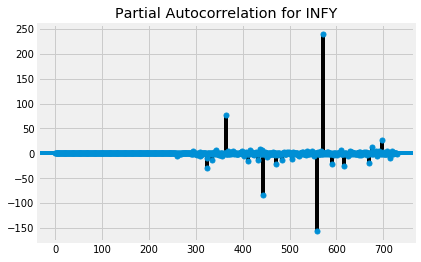

In [32]:
#plotting partial autocorrelations

print(plot_pacf(infy['Close'],title='Partial Autocorrelation for INFY'))

C:\Users\Shikha\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


Figure(432x288)


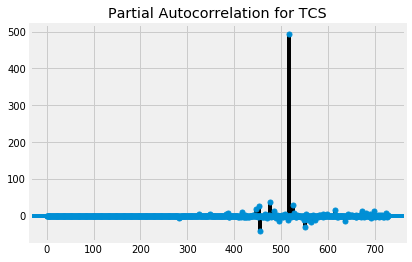

In [33]:
print(plot_pacf(tcs['Close'],title='Partial Autocorrelation for TCS'))

C:\Users\Shikha\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


Figure(432x288)


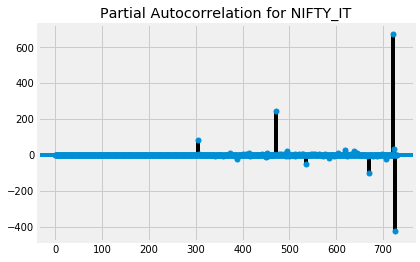

In [34]:
print(plot_pacf(nifty_it['Close'],title='Partial Autocorrelation for NIFTY_IT'))

In [35]:
#Building models


infy["Open_next"] = (infy["Open"].shift(-1)).fillna(method='ffill')

tcs["Open_next"] = (tcs["Open"].shift(-1)).fillna(method='ffill')

cols = ["Open","High","Low","Close","Volume","Turnover"]


data_infy = infy[cols]
data_tcs = tcs[cols]

#assigning the Open_next column as target
target_infy = infy['Open_next']
target_tcs = tcs['Open_next']

data_infy.sample(3)

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2016-10-25,1036.5,1038.90,1015.2,1017.20,2818007,2.881233e+14
2015-10-01,1169.9,1197.75,1160.0,1173.05,5432197,6.406992e+14
2015-07-05,988.0,993.00,982.0,990.30,1347653,1.333778e+14


In [36]:
#Splitting the data set into train and test data sets

data_infy_train, data_infy_test, target_infy_train, target_infy_test = train_test_split(data_infy,target_infy, test_size = 0.30, random_state = 10)

data_tcs_train, data_tcs_test, target_tcs_train, target_tcs_test = train_test_split(data_tcs,target_tcs, test_size = 0.30, random_state = 10)

In [37]:
#Linear Regression Model

reg_infy = LinearRegression().fit(data_infy_train, target_infy_train)
reg_tcs = LinearRegression().fit(data_tcs_train, target_tcs_train)

accuracy_infy = reg_infy.score(data_infy_test,target_infy_test)
accuracy_tcs = reg_tcs.score(data_tcs_test,target_tcs_test)

print("accuracy of model for INFY stock:",accuracy_infy)
print("accuracy of model for TCS stock:",accuracy_tcs)

accuracy of model for INFY stock: 0.9991129240602497
accuracy of model for TCS stock: 0.974599332003822


In [38]:
#LassoLars Model for INFY

reg_infy = linear_model.LassoLars(alpha=0.01)
reg_infy.fit(data_infy_train, target_infy_train)

LassoLars(alpha=0.01, copy_X=True, eps=..., fit_intercept=True,fit_path=True,
          max_iter=500, normalize=True, positive=False, precompute='auto', verbose=False)

accuracy_infy=reg_infy.score(data_infy_test,target_infy_test)
print("Accuracy of LassoLars model for INFY:",accuracy_infy)



Accuracy of LassoLars model for INFY: 0.9992474940004525


In [39]:
#LassoLars Model for TCS

reg_tcs = linear_model.LassoLars(alpha=0.01)
reg_tcs.fit(data_tcs_train, target_tcs_train)

LassoLars(alpha=0.01, copy_X=True, eps=..., fit_intercept=True,fit_path=True,
          max_iter=500, normalize=True, positive=False, precompute='auto', verbose=False)

accuracy_tcs=reg_tcs.score(data_tcs_test,target_tcs_test)
print("Accuracy of LassoLars model for TCS:",accuracy_tcs)

Accuracy of LassoLars model for TCS: 0.9756185243010986
